In [36]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\\ x = \Re(\sqrt{Z_{n}/ |Z_{n}|})
\\ y = \Im(\sqrt{Z_{n}/ |Z_{n}|})*i
\\ dv = |Z_{n} - Z_{0}|
\\ Z_{n+1} = Z_{n} - ( a*x^3 + 3*b*x^2*y + 3*c*x*y^2 + d*y^3 )^{Z_{n}*dv}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# numerical oddity: variation of binomial expansion produces humanoid

    Sequential iteration of difference equation:
    Zr = sqrt(Z/abs(Z));
    x = real(Zr);
    y = imag(Zr)*i;
    d = abs(Z-Z0)
    Z = Z - ( p(1)*x^3 + 3*p(2)*x^2*y + 3*p(3)*x*y^2 + p(4)*y^3 )^(Z*d);

    with parameter set:
    p = [1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]
    
    on the complex plane produces a torso and head like figure.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import SVG
from IPython.display import Image
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as ip

sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [9]:
def T_Spake_Z(Z, p, Z0=None, ET=None):
    """ Z = T_Spake_Z(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number

    Returns:
        Z:    the result (complex)
    """
    d = np.abs(Z-Z0)
    Zxy = np.sqrt(Z/np.abs(Z))
    x = np.real(Zxy)
    y = np.imag(Zxy)*1j
    Z = Z - ( p[0]*x**3 + 3*p[1]*x**2*y + 3*p[2]*x*y**2 + p[3]*y**3 )**(Z*d)

    return Z

In [10]:
p = [1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]
Z0 = 1+1j
Z = T_Spake_Z(Z0, p, Z0)
Z

1j

In [23]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 600}
par_set['center_point'] = 1/3 + 0.0j
par_set['theta'] = np.pi/2
par_set['zoom'] = 1/3

par_set['it_max'] = 65
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(T_Spake_Z, ([1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

150.5206868648529 	 total time


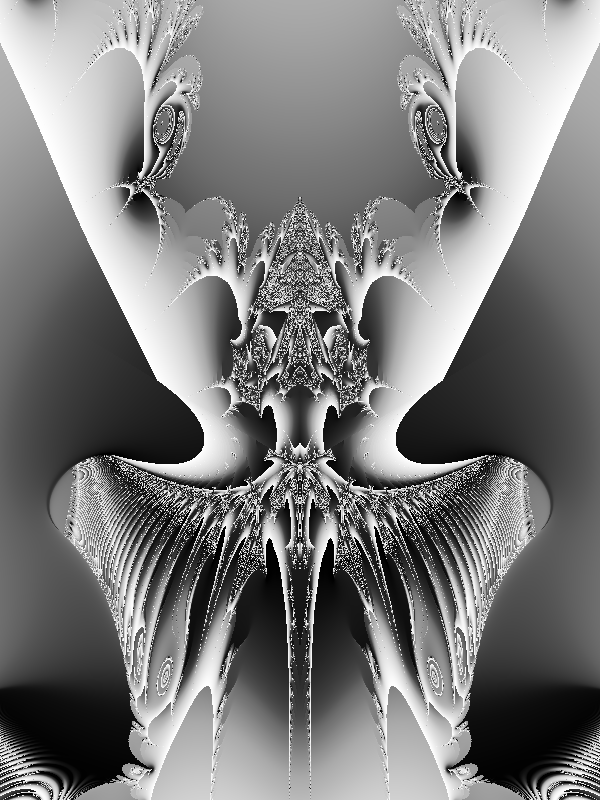

In [24]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))

In [ ]:
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

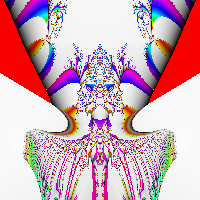

In [14]:
Ic = gu.Z_ET_to_show((Z-Z0), ET)
display(Ic)